In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
from skimage import exposure
def global_histogram_equalization(img):
    return cv2.equalizeHist(img)
def local_histogram_equalization(img, kernel_size=15):
    local_eq=np.zeros_like(img)
    half_k=kernel_size // 2
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            x1=max(i-half_k, 0)
            x2=min(i+half_k+1, rows)
            y1=max(j-half_k, 0)
            y2=min(j+half_k+1, cols)
    local_region=img[x1:x2, y1:y2]
    local_hist_eq=cv2.equalizeHist(local_region)
    local_eq[i, j] = local_hist_eq[half_k, half_k]

    return local_eq

def adaptive_histogram_equalization(img, clip_limit=0.05):
    ad_eq=exposure.equalize_adapthist(img, clip_limit=clip_limit)
    return (ad_eq * 255).astype(np.uint8)

def contrast_limited_histogram_equalization(img, clip_limit=0.05, tile_grid_size=(8, 8)):
    clahe =cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(img)

image_path='kitty.jpg'
img=cv2.imread(r"kitty.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    print(f"Error: Unable to load image at {image_path}")
    exit()

In [2]:
global_eq=global_histogram_equalization(img)
local_eq=local_histogram_equalization(img)
adaptive_eq=adaptive_histogram_equalization(img)
clahe_eq=contrast_limited_histogram_equalization(img)

In [3]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

(Text(0.5, 1.0, 'Original Image'), ([], []), ([], []))

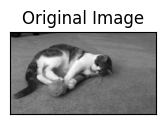

In [4]:
plt.subplot(231), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Global Histogram Equalization'), ([], []), ([], []))

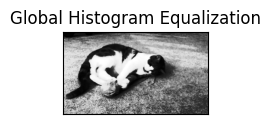

In [6]:

plt.subplot(232), plt.imshow(global_eq, cmap='gray')
plt.title('Global Histogram Equalization'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Local Histogram Equalization'), ([], []), ([], []))

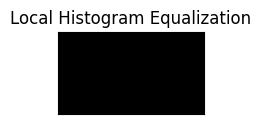

In [7]:

plt.subplot(233), plt.imshow(local_eq, cmap='gray')
plt.title('Local Histogram Equalization'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Adaptive Histogram Equalization'), ([], []), ([], []))

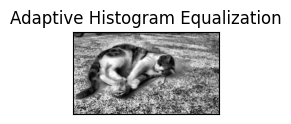

In [8]:

plt.subplot(234), plt.imshow(adaptive_eq, cmap='gray')
plt.title('Adaptive Histogram Equalization'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Contrast Limited Histogram Equalization (CLAHE)'),
 ([], []),
 ([], []))

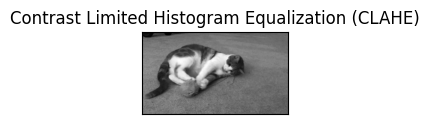

In [9]:

plt.subplot(235), plt.imshow(clahe_eq, cmap='gray')
plt.title('Contrast Limited Histogram Equalization (CLAHE)'), plt.xticks([]), plt.yticks([])